<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_investimentos/blob/master/PUT_Ago_24_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
# Implementation of Black-Scholes formula in Python
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [123]:
# Função para calcular o preço de uma opção de compra (call) usando o modelo Black-Scholes
def black_scholes_call(S, Kp, T, r, sigma):
    d1 = (np.log(S / Kp) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - Kp * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Função para calcular o preço de uma opção de venda (put) usando o modelo Black-Scholes
def black_scholes_put(S, Kp, T, r, sigma):
    d1 = (np.log(S / Kp) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = Kp * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

# Função para calcular o preço da opção baseado no tipo (call ou put)
def black_scholes_option(S, Kp, T, r, sigma, option_type='call'):
    if option_type == 'call':
        return black_scholes_call(S, Kp, T, r, sigma)
    elif option_type == 'put':
        return black_scholes_put(S, Kp, T, r, sigma)
    else:
        raise ValueError("option_type deve ser 'call' ou 'put'")

In [124]:
# Parâmetros
S = np.linspace(35, 42, 100)  # Variação do preço do ativo
Kpc = 38.5  # Preço de exercício da Put comprada
Kpv = 37.67  # Preço de exercício da Put vendida
r = 0.105  # Taxa de juros livre de risco
σ = 0.25  # Volatilidade para a Put vendida
sigma = σ
option_type = 'put'  # Tipo da opção ('call' ou 'put')

S1 = 38.5  # Preço atual do ativo subjacente
t = 252    # Tempo do ano em dias
T = (40/t)  # Tempo até o vencimento em dias

PUT Comprada

In [125]:
# Plot do gráfico da PETR4 (Stk =38.17 / DTE= 45 - 18_10 / Comprado / P= 0.97 / SPT = 38.5 / 19_08)
# Parâmetros
Kpc = 38.17  # Preço de exercício da Put Comprada
σ1 = 0.2235  # Volatilidade implícita
sigma1 = σ1

Tc = (45/t)  # Tempo até o vencimento em dias

In [126]:
Ppc = black_scholes_option(S1, Kpc, Tc, r, sigma1, option_type)
print(Ppc)

0.9705584591786405


In [127]:
PUT_comprada = black_scholes_option(S, Kpc, Tc, r, sigma, option_type)-Ppc

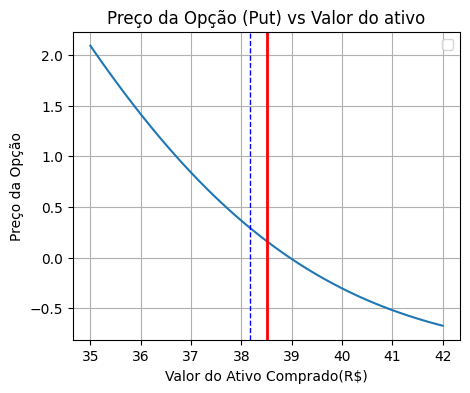

In [128]:
# Plot do gráfico
plt.figure(figsize=(5, 4))
plt.plot(S, PUT_comprada)
plt.axvline(x=Kpc,ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.axvline(x=S1,ymin=0,ymax=10.0, color='r', linestyle='solid',linewidth=2)
plt.xlabel('Valor do Ativo Comprado(R$)')
plt.ylabel('Preço da Opção')
plt.title(f'Preço da Opção ({option_type.capitalize()}) vs Valor do ativo')
plt.legend()
plt.grid(True)
plt.show()

PUT Vendida

In [129]:
# Plot do gráfico da PETR4 (Stk =37.67 / DTE= 25 - 20_09 / Vendido / P= 0.58 / SPT = 38.5 / 19_08)
# Parâmetros
σ2 = 0.228  # Volatilidade
sigma2 = σ

Tv = (25/t)  # Tempo até o vencimento em dias
Tf = (0.0001/t)  # Tempo até o vencimento em dias

In [130]:
Ppv = black_scholes_option(S1, Kpv, Tv, r, sigma, option_type)

PUT_vendida = Ppv - black_scholes_option(S, Kpv, Tf, r, sigma, option_type)
print(Ppv)

0.6779079043643463


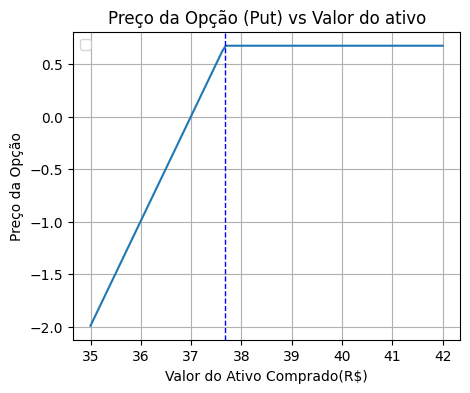

In [131]:
# Plot do gráfico
plt.figure(figsize=(5, 4))
plt.plot(S, PUT_vendida)
plt.axvline(x=Kpv,ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.xlabel('Valor do Ativo Comprado(R$)')
plt.ylabel('Preço da Opção')
plt.title(f'Preço da Opção ({option_type.capitalize()}) vs Valor do ativo')
plt.legend()
plt.grid(True)
plt.show()

In [132]:
Estrategia =  PUT_comprada + PUT_vendida

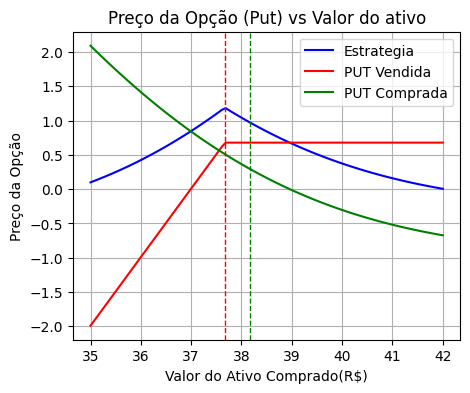

In [133]:
#St = np.linspace(36, 44, 100)  # Variação do preço do ativo

# Plot do gráfico
plt.figure(figsize=(5, 4))
plt.plot(S, Estrategia, label='Estrategia', color='b')
plt.plot(S, PUT_vendida, label='PUT Vendida', color='r')
plt.plot(S, PUT_comprada, label='PUT Comprada', color='g')
plt.axvline(x=Kpc,ymin=0,ymax=10.0, color='g', linestyle='dashed',linewidth=1)
plt.axvline(x=Kpv,ymin=0,ymax=10.0, color='r', linestyle='dashed',linewidth=1)
plt.xlabel('Valor do Ativo Comprado(R$)')
plt.ylabel('Preço da Opção')
plt.title(f'Preço da Opção ({option_type.capitalize()}) vs Valor do ativo')
plt.legend()
plt.grid(True)
plt.show()

O gráfico acima está levemente distorcido porque a Put comprada está com DTE de 45 dias, enquanto que avendida está com DTE de 25 dias.

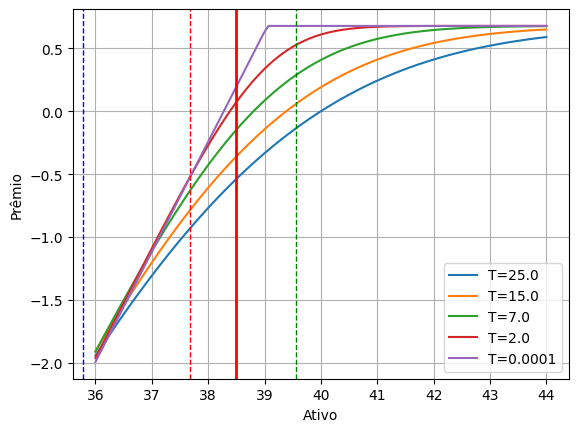

<Figure size 500x400 with 0 Axes>

In [134]:
# Solução de BS para diferentes prazos
for Ti in [25/252,15/252,7/252,2/252,0.0001/252]:
  PUT_vendida1 = Ppv - black_scholes_option(S, Kpv, Ti, r, sigma, option_type)
  plt.plot(St,PUT_vendida1,label=r'T='+str(Ti*252))

plt.axvline(x=Kpv,ymin=0,ymax=10.0, color='r', linestyle='dashed',linewidth=1)
plt.axvline(x=Kpv*(1+0.05),ymin=0,ymax=10.0, color='g', linestyle='dashed',linewidth=1)
plt.axvline(x=Kpv*(1-0.05),ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.axvline(x=S1,ymin=0,ymax=10.0, color='r', linestyle='solid',linewidth=2)
plt.grid()
plt.legend()
plt.xlabel('Ativo')
plt.ylabel('Prêmio')
plt.figure(figsize=(5, 4))
plt.show()

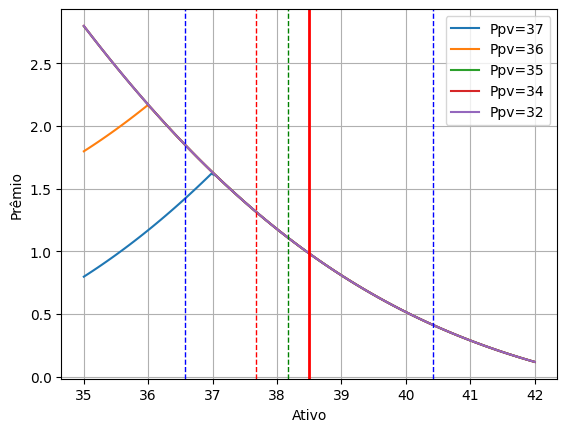

<Figure size 500x400 with 0 Axes>

In [135]:
# O Peso considera que a quantidade de Puts vendidas é diferente da comprada numa razão
# de Put comprada / Put Vendida, o que acaba distorcendo o resultado final do gráfico de payoff.
Peso2 = 1

# Solução de BS para diferentes prazos
for Kpvi in [37,36,35,34,32]:
  PUT_vendida = (Ppv - black_scholes_option(S, Kpvi, Tf, r, sigma, option_type))*Peso2
  PUT_comprada = black_scholes_option(S, Kpc, T+(20/252), r, sigma, option_type)-Ppc
  Estrategia =  PUT_comprada + PUT_vendida
  #plt.plot(Sn,PUT_vendida,label=r'T='+str(Kpvi*252))
  #plt.plot(Sn,PUT_comprada,label=r'T='+str(Kpvi*252))
  plt.plot(S,Estrategia,label=r'Ppv='+str(Kpvi))

plt.axvline(x=Kpc,ymin=0,ymax=10.0, color='g', linestyle='dashed',linewidth=1)
plt.axvline(x=Kpv,ymin=0,ymax=10.0, color='r', linestyle='dashed',linewidth=1)
plt.axvline(x=S1*(1+0.05),ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.axvline(x=S1*(1-0.05),ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.axvline(x=S1,ymin=0,ymax=10.0, color='r', linestyle='solid',linewidth=2)
plt.grid()
plt.legend()
plt.xlabel('Ativo')
plt.ylabel('Prêmio')
plt.figure(figsize=(5, 4))
plt.show()

Este mesmo estudo poderia ser feito para o ramo esquerdo do gráfico e mostria a relação entre quantidades vendidas e compradas para uma estratégia de maximizar o ganho em caso de queda, o que aumentaria os custos da operação.

In [136]:
DTEc = Tc*252
DTEv = Tv*252
Ppve = black_scholes_option(30, Kpv, Tv, r, sigma, option_type)
Ppce = black_scholes_option(30, Kpc, Tc, r, sigma, option_type)
#Peso = Ppce/Ppve
print(f"DTE para comprado ={DTEc : .2f}, DTE para comprado ={DTEv : .2f}" )
print(f"Prêmio de puts compradas em preços inferiores a R$ 30,00 : {Ppve : .2f}, Prêmio de puts vendidas: {Ppce : .2f} vezes a quantidade de puts vendidas.")
print(f"A diferença entre prêmio é um valor de aproximadamente R$ {Ppve-Ppce-0.01 : .2f}")

DTE para comprado = 45.00, DTE para comprado = 25.00
Prêmio de puts compradas em preços inferiores a R$ 30,00 :  7.28, Prêmio de puts vendidas:  7.48 vezes a quantidade de puts vendidas.
A diferença entre prêmio é um valor de aproximadamente R$ -0.21


O que acontece se efastar os estrikes? \

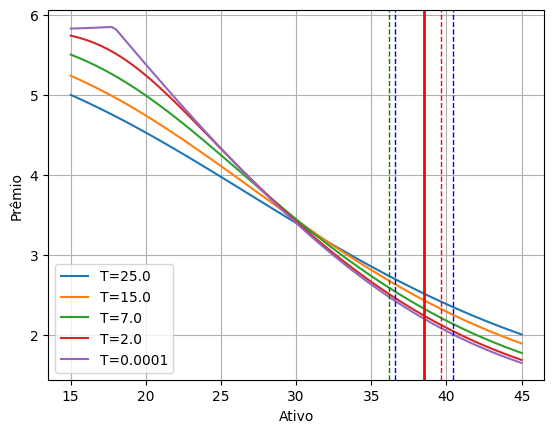

<Figure size 500x400 with 0 Axes>

Prêmio  0.50 de puts compradas :  36.17, Prêmio  1.64 de puts vendidas:  39.67 vezes a quantidade de puts vendidas.


In [137]:
S2 = np.linspace(15, 45, 100)  # Variação do preço do ativo
# O Peso considera que a quantidade de Puts vendidas é diferente da comprada numa razão
# de Put comprada / Put Vendida, o que acaba distorcendo o resultado final do gráfico de payoff.
Peso2 = 1

Kpv2 = Kpv+2
Kpc2 = Kpc-2

Ppv2 = black_scholes_option(S1, Kpv2, Tv, r, sigma, option_type)
Ppc2 = black_scholes_option(S1, Kpc2, Tc, r, sigma, option_type)

# Solução de BS para diferentes prazos
for Ti in [25/252,15/252,7/252,2/252,0.0001/252]:
  PUT_vendida2 = (Ppv2 - black_scholes_option(S, Kpv-2, Ti, r, sigma, option_type))*Peso2
  PUT_comprada2 = black_scholes_option(S, Kpc+2.5, Ti+(20/252), r, sigma, option_type)-Ppc2
  Estrategia2 =  PUT_comprada2 + PUT_vendida2
  #plt.plot(S2,PUT_vendida,label=r'T='+str(Ti*252))
  #plt.plot(S2,PUT_comprada,label=r'T='+str(Ti*252))
  plt.plot(S2,Estrategia2,label=r'T='+str(Ti*252))

plt.axvline(x=Kpc2,ymin=0,ymax=10.0, color='g', linestyle='dashed',linewidth=1)
plt.axvline(x=Kpv2,ymin=0,ymax=10.0, color='r', linestyle='dashed',linewidth=1)
plt.axvline(x=S1*(1+0.05),ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.axvline(x=S1*(1-0.05),ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.axvline(x=S1,ymin=0,ymax=10.0, color='r', linestyle='solid',linewidth=2)
plt.grid()
plt.legend()
plt.xlabel('Ativo')
plt.ylabel('Prêmio')
plt.figure(figsize=(5, 4))
plt.show()

print(f"Prêmio {Ppc2 : .2f} de puts compradas : {Kpc2 : .2f}, Prêmio {Ppv2 : .2f} de puts vendidas: {Kpv2 : .2f} vezes a quantidade de puts vendidas.")

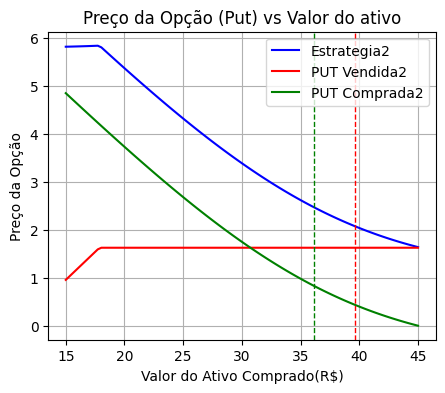

In [138]:
# Plot do gráfico
plt.figure(figsize=(5, 4))
plt.plot(S2, Estrategia2, label='Estrategia2', color='b')
plt.plot(S2, PUT_vendida2, label='PUT Vendida2', color='r')
plt.plot(S2, PUT_comprada2, label='PUT Comprada2', color='g')
plt.axvline(x=Kpc2,ymin=0,ymax=10.0, color='g', linestyle='dashed',linewidth=1)
plt.axvline(x=Kpv2,ymin=0,ymax=10.0, color='r', linestyle='dashed',linewidth=1)
plt.xlabel('Valor do Ativo Comprado(R$)')
plt.ylabel('Preço da Opção')
plt.title(f'Preço da Opção ({option_type.capitalize()}) vs Valor do ativo')
plt.legend()
plt.grid(True)
plt.show()

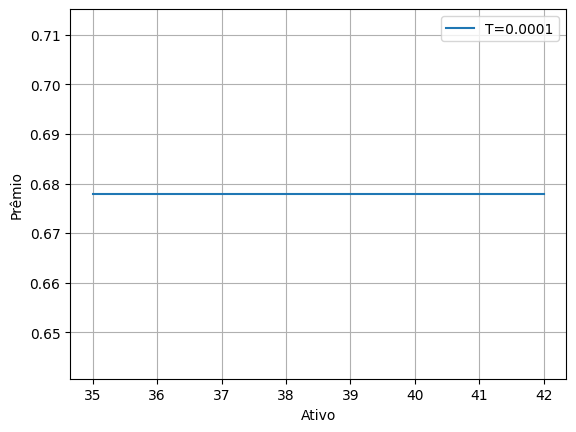

<Figure size 500x400 with 0 Axes>

In [139]:
plt.plot(S,PUT_vendida,label=r'T='+str(Ti*252))
plt.grid()
plt.legend()
plt.xlabel('Ativo')
plt.ylabel('Prêmio')
plt.figure(figsize=(5, 4))
plt.show()

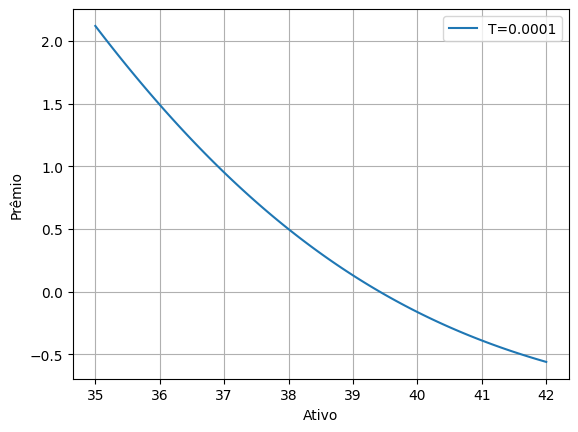

<Figure size 500x400 with 0 Axes>

In [140]:
plt.plot(S,PUT_comprada,label=r'T='+str(Ti*252))
plt.grid()
plt.legend()
plt.xlabel('Ativo')
plt.ylabel('Prêmio')
plt.figure(figsize=(5, 4))
plt.show()

O que acontece se jogar os strikes mais para fora do dinheiro?